# Introduction
In this notebook, we continue with ODI performance of international bowlers dataset. In this we will be completing the following tasks:

### 1. Data Pre-processing
* Removing unnecessary features
* Feature Engineering
* Encoding categorical features
* Filling missing values

### 2. Model implementations
* Implementing supervised machine learning models
* Calculating Accuracy score, Precision score, F1-score and Recall score of the implemented models

In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
dataset=pd.read_csv('Batsman_Data.csv')

# Data Pre-processing

In [4]:
#checking for missing values
dataset.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [5]:
#bowlingStyle contains categorical values, so it is best to fill the missing values with mode
dataset['Runs'].fillna(dataset['Runs'].mode()[0], inplace=True)


#rest of the missing values are replaced by medians of the respective columns
def fmedian(df,col):
    median_value=df[col].median()
    df[col].fillna(median_value, inplace=True)


In [6]:
dataset.dtypes

Unnamed: 0     int64
Bat1          object
Runs          object
BF            object
SR            object
4s            object
6s            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Batsman       object
Player_ID      int64
dtype: object

## Label Encoding
Here, we are label encoding all the categorical variables using Label Encoder from sklearn library.

In [10]:
from sklearn.preprocessing import LabelEncoder

def encode(df,col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

encode(dataset,'Player_ID')
encode(dataset,'Runs')
encode(dataset,'4s')
encode(dataset,'6s')
encode(dataset,'Batsman')
encode(dataset,'Ground')
encode(dataset,'Opposition')

In [12]:
dataset.Batsman

0        113
1        113
2        113
3        113
4        113
        ... 
11144     42
11145     42
11146     42
11147     42
11148     42
Name: Batsman, Length: 11149, dtype: int32

## Checking Correlation
We will be checking correlations between the variables to better understand the data.

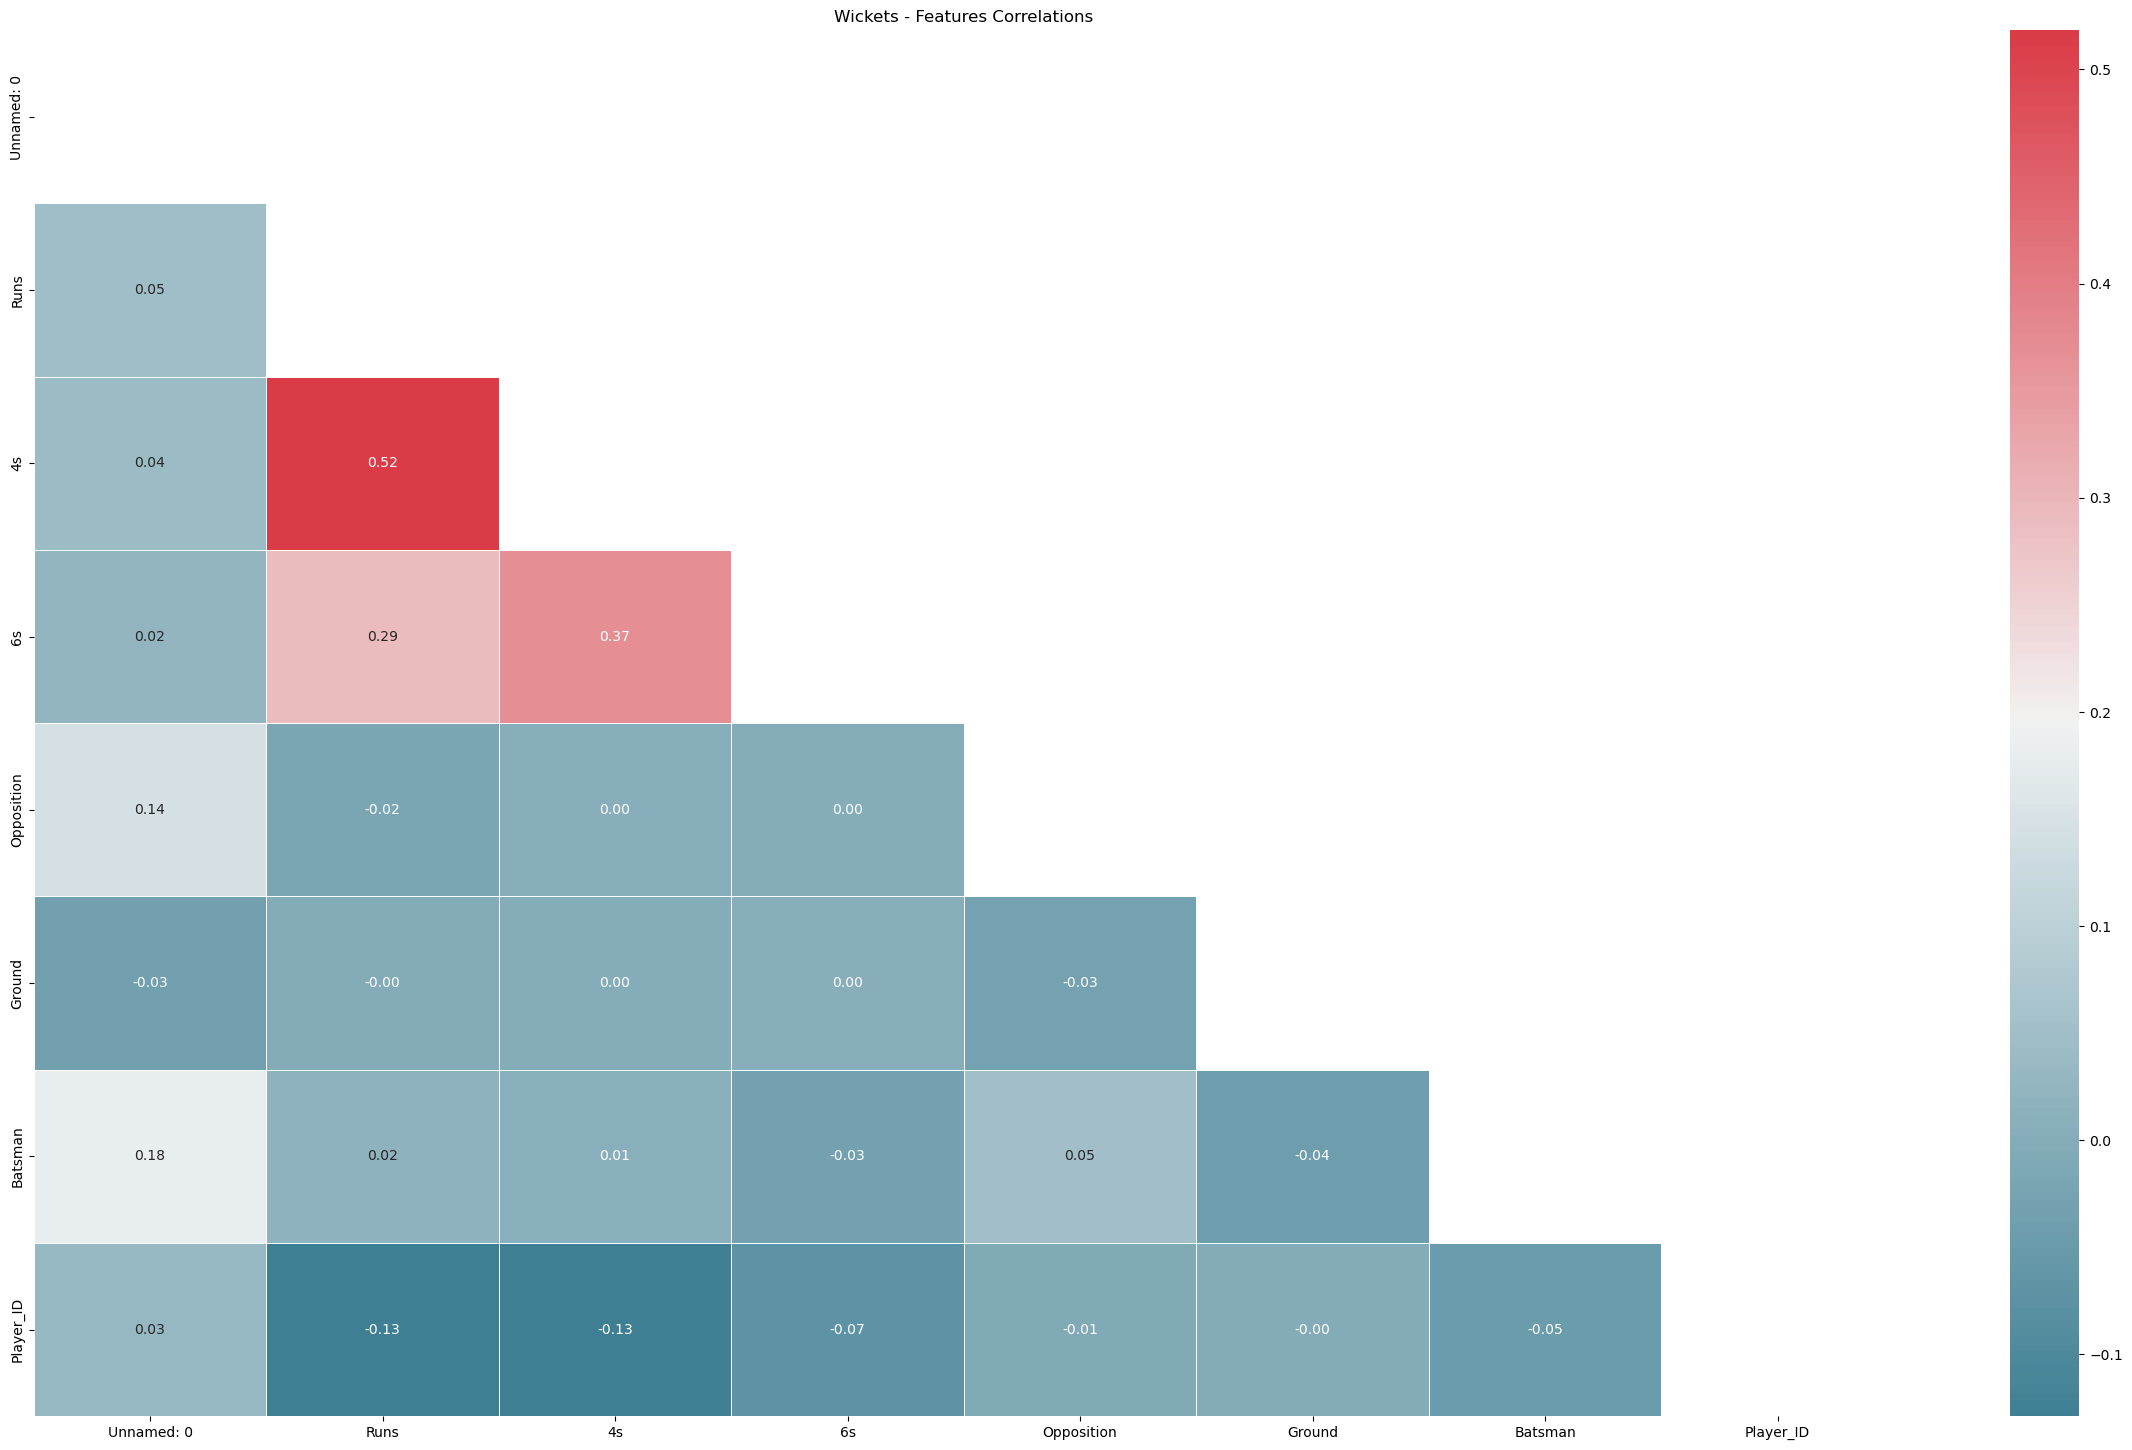

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(30, 18))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Wickets - Features Correlations')
plt.show()

In [9]:
#Balls bowled and Overs Bowled are perfectly corelated, so it is necessary to remove one of them
dataset.drop('4s',axis=1,inplace=True)

In [14]:
target=dataset['Ground']
train=dataset.drop('Ground', axis=1)

In [15]:
target.value_counts()

38     839
59     372
117    354
1      319
31     317
      ... 
130      1
62       1
124      1
51       1
67       1
Name: Ground, Length: 134, dtype: int64

## Class Imbalance
We observed that majority of the records fall within class 1 in bowling. This created a major imbalance in the distribution of values and affected the performance of the learning algorithms. To solve this problem, we applied an oversampling technique Supervised Minority Oversampling Technique (SMOTE) on minority classes to make all the classes equally distributed.

In [ ]:
#applying SMOTE
from imblearn.combine  import SMOTETomek
smk=SMOTETomek(random_state=42)
train_new,target_new=(smk.fit_resample(train,target))

In [ ]:
#splitting dataset into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new, target_new, test_size = 0.20, random_state = 0)

# Model Implementation
1. Naive Bayes
2. Decision Trees
3. Random Forest

### Naive Baye's 

In [14]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)

In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.6793436696099562
Precision - 0.8303795062562536
Recall - 0.6793436696099562
F1 - 0.6694129893367001


### Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', splitter='best',
                             max_depth=16, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features=None, random_state=None,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight=None, 
                             presort='deprecated', ccp_alpha=0.0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.9415108113745394
Precision - 0.9430771772264509
Recall - 0.9415108113745394
F1 - 0.9414950361874659


### Random Forest 

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.9989571021344643
Precision - 0.9989597521368501
Recall - 0.9989571021344643
F1 - 0.9989571053617463


# Conclusion
With an accuracy of 0.99, Random Forest has been performing the best for our dataset while Naive Bayes has been performing the worst with an accuracy of 0.68.